#Part 1: 파이썬을 사용한 데이터 처리
###Question 1
test_array.csv 파일의 데이터를 불러와 변수 b에 저장하기

In [1]:
import numpy as np
a = np.array([[1,2],
              [3,4]])
np.savetxt('test_array.csv', a, delimiter = ',')

b = np.loadtxt('test_array.csv', delimiter=',')
print(b)

[[1. 2.]
 [3. 4.]]


###Question 2
과제의 data 폴더의 ex1data.txt 파일을 불러와 train_data 변수에 저장하기

In [2]:
#content/drive/MyDrive/ml 구글 드라이브 안에 넣고 구글 colab에서 작업
train_data = np.loadtxt("/content/drive/MyDrive/ml/ex1data1.txt", delimiter=',')
print(train_data)

[[ 6.1101  17.592  ]
 [ 5.5277   9.1302 ]
 [ 8.5186  13.662  ]
 [ 7.0032  11.854  ]
 [ 5.8598   6.8233 ]
 [ 8.3829  11.886  ]
 [ 7.4764   4.3483 ]
 [ 8.5781  12.     ]
 [ 6.4862   6.5987 ]
 [ 5.0546   3.8166 ]
 [ 5.7107   3.2522 ]
 [14.164   15.505  ]
 [ 5.734    3.1551 ]
 [ 8.4084   7.2258 ]
 [ 5.6407   0.71618]
 [ 5.3794   3.5129 ]
 [ 6.3654   5.3048 ]
 [ 5.1301   0.56077]
 [ 6.4296   3.6518 ]
 [ 7.0708   5.3893 ]
 [ 6.1891   3.1386 ]
 [20.27    21.767  ]
 [ 5.4901   4.263  ]
 [ 6.3261   5.1875 ]
 [ 5.5649   3.0825 ]
 [18.945   22.638  ]
 [12.828   13.501  ]
 [10.957    7.0467 ]
 [13.176   14.692  ]
 [22.203   24.147  ]
 [ 5.2524  -1.22   ]
 [ 6.5894   5.9966 ]
 [ 9.2482  12.134  ]
 [ 5.8918   1.8495 ]
 [ 8.2111   6.5426 ]
 [ 7.9334   4.5623 ]
 [ 8.0959   4.1164 ]
 [ 5.6063   3.3928 ]
 [12.836   10.117  ]
 [ 6.3534   5.4974 ]
 [ 5.4069   0.55657]
 [ 6.8825   3.9115 ]
 [11.708    5.3854 ]
 [ 5.7737   2.4406 ]
 [ 7.8247   6.7318 ]
 [ 7.0931   1.0463 ]
 [ 5.0702   5.1337 ]
 [ 5.8014   1

#Part 2: 그래프 그리기
###Question 3
x,y 값을 받아서 위의 그래프를 그리는 함수를 완성하기

In [3]:
import matplotlib
import matplotlib.pyplot as plt

def plot_data(x, y, x_title = '', y_title = ''):
  plt.scatter(x, y, marker = 'x')
  plt.xlabel(x_title)
  plt.ylabel(y_title)
  plt.show()

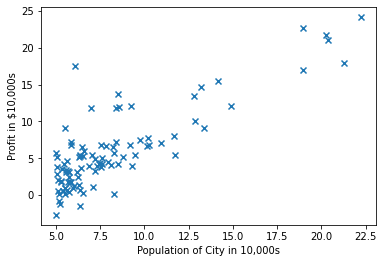

In [4]:
x = train_data[:, 0] #인구수
y = train_data[:, 1] #매출
plot_data(x, y, 'Population of City in 10,000s', 'Profit in $10,000s')

#Part3: Linear Regression
###Question 4-1
 cost function 정의하기

In [5]:
# cost function 정의
def cost_function(theta, X, y):      #theta[0]이 b, theta[1]이 w이다. y = b + w*x
  pred_y = np.dot(X, theta)          #pred_y.shape => (97,1)  H
  diff = pred_y - y
  cost = np.power(diff, 2).sum(axis=0) / (2*len(y))
  return cost

In [6]:
theta = np.zeros((2,1))
x = train_data[:, 0, np.newaxis]     #x.shape      => (97,1)
y = train_data[:, 1, np.newaxis]     #y.shape      => (97,1)

x_0 = np.ones((x.shape[0], 1))       #x_0.shape    => (97,1)
X = np.concatenate((x_0, x), axis=1) #X.shape      => (97,2)

print(cost_function(theta, X, y))

[32.07273388]


##Question 4-2
Gradient Descent 알고리즘을 구현하여 theta 구하기

In [7]:
def update_func(theta, X, y, alpha = 0.01):
  pred_y = np.dot(X, theta)          
  diff = pred_y - y

  theta[0] = theta[0] - diff.sum(axis=0)*alpha/len(y)
  theta[1] = theta[1] - (diff*X[:,1:2]).sum(axis=0)*alpha/len(y)  #diff*x -> diff*X[:, 1:2]

  new_theta = theta
  return new_theta

In [8]:
niter = 1500
for i in range(niter):
  new_theta = update_func(theta, X, y, alpha = 0.01)
  theta = new_theta

print(theta)
print('Expected theta [-3.6303, 1.1664]')

[[-3.63029144]
 [ 1.16636235]]
Expected theta [-3.6303, 1.1664]


###Question 5
Gradient 알고리즘으로 구한 모델을 기존 데이터와 함께 그려, 모델이 적합한지 확인하기

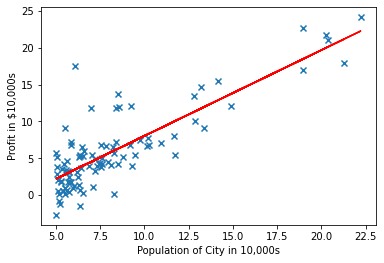

In [9]:
plt.scatter(x, y, marker='x') 
plt.plot(x, np.dot(X, theta), 'r')
plt.ylabel('Profit in $10,000s')              # y축 레이블 설정
plt.xlabel('Population of City in 10,000s')   # x축 레이블 설정
plt.show()

###Question 6
위의 gradient descent 알고리즘을 사용할 때, 매 iteration에서 cost function의 변화를 그래프로 표현하기

Text(0.5, 1.0, 'cost function by iteration')

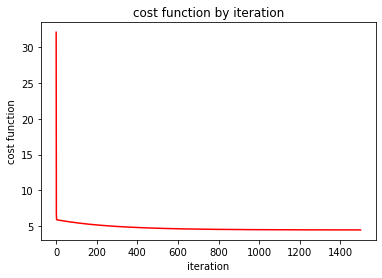

In [ ]:
theta = np.zeros((2,1))
x = train_data[:, 0, np.newaxis]     #x.shape      => (97,1)
y = train_data[:, 1, np.newaxis]     #y.shape      => (97,1)

x_0 = np.ones((x.shape[0], 1))       #x_0.shape    => (97,1)
X = np.concatenate((x_0, x), axis=1) #X.shape      => (97,2)

cost_functions = []
niter = 1500
for i in range(niter):
  cost_functions.append(cost_function(theta, X, y))
  theta = update_func(theta, X, y, alpha = 0.01)


# iteration에 따른 cost function의 변화
plt.plot(cost_functions, 'r')
plt.xlabel("iteration")
plt.ylabel("cost function")
plt.title("cost function by iteration")

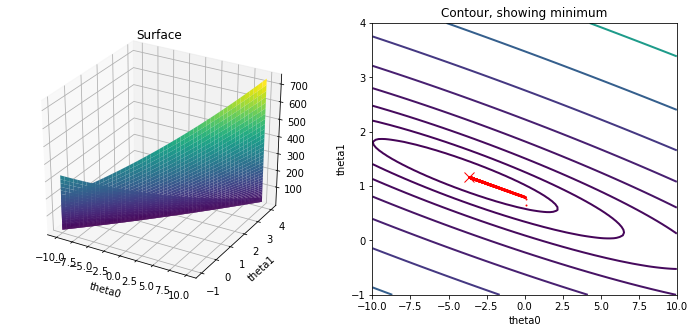

In [28]:
theta0_vals = np.linspace(-10, 10, y.shape[0])
theta1_vals = np.linspace(-1, 4, y.shape[0])
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        theta_ = np.array([[theta0, theta1]]).T                      
        J_vals[i, j] = cost_function(theta_, X, y)
        
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')

ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# contour plot
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Contour, showing minimum')

theta = np.zeros((2,1))
niter = 1500
for i in range(niter):
    new_theta = update_func(theta, X, y, alpha=0.01)
    theta = new_theta
    plt.plot(theta[0], theta[1], 'ro', ms=1, lw=1)  # 학습할 때의 theta 표시

plt.plot(theta[0], theta[1], 'rx', ms=10, lw=2)  # 최종 theta 표시

###Question 7
Learning rate alpha를 0.1로 했을 때, cost function의 값이 어떻게 변화하고, 그 이유는 무엇인가

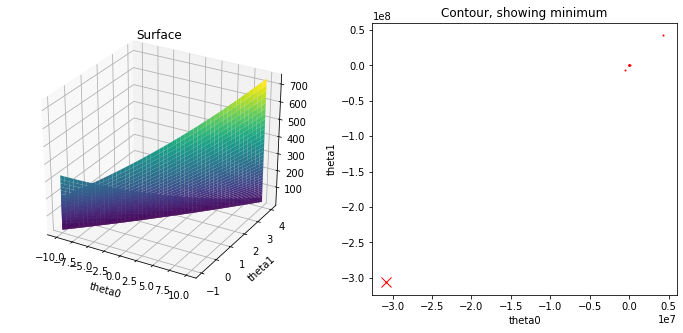

In [29]:
theta0_vals = np.linspace(-10, 10, y.shape[0])
theta1_vals = np.linspace(-1, 4, y.shape[0])
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        theta_ = np.array([[theta0, theta1]]).T                      
        J_vals[i, j] = cost_function(theta_, X, y)
        
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')

ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# contour plot
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Contour, showing minimum')

theta = np.zeros((2,1))
niter = 10  #iteration 10으로 변경
for i in range(niter):
    new_theta = update_func(theta, X, y, alpha=0.1)  # learning rate 0.1로 변경
    theta = new_theta
    plt.plot(theta[0], theta[1], 'ro', ms=1, lw=1)  # 학습할 때의 theta 표시

plt.plot(theta[0], theta[1], 'rx', ms=10, lw=2)  # 최종 theta 표시

Answer: learning rate alpha를 0.1로 하니, 1~10 iteration의 theta가 cost function이 최소가 되도록 하는 theta값까지 도달하지 못하는 것을 확인할 수 있다.

###Question 8
Normal equation 구현하기

In [31]:
def compute_normal_eq(X,y):
  theta = np.zeros((2,1))
  theta = np.linalg.pinv((X.T).dot(X)).dot((X.T).dot(y))
  return theta

In [32]:
x = train_data[:, 0, np.newaxis]  
y = train_data[:, 1, np.newaxis]   

x_0 = np.ones((x.shape[0], 1))  
X = np.concatenate((x_0, x), axis=1)

print(compute_normal_eq(X,y))

[[-3.89578088]
 [ 1.19303364]]


###Question 9
Normal equation 과 gradient descent의 실행시간은?

In [34]:
# gradient descent
def gradient_descent(X, y):
  alpha = 0.01
  n_iter = 1500

  theta = np.zeros((n_features+1,1))

  pred_y = np.dot(X, theta)          
  diff = pred_y - y

  for i in range(n_iter):
    theta = theta - (diff*X).sum(axis=0)*alpha/len(y)
  return theta

# normal equation
def normal_eq(x,y):
  theta = np.zeros((2,1))
  theta = np.linalg.pinv((x.T).dot(X)).dot((X.T).dot(y))
  return theta


In [35]:
# normal equation 과 gradient descent의 실행시간 비교
# feature이 1, 10, 100, 1000, 10000 인 경우
for i in range(5):
  n_features = 10**(i)
  m = 100
  x = np.random.random((100, n_features))
  y = np.random.random((100, 1))

  x_0 = np.ones((x.shape[0], 1))
  X = np.concatenate((x_0, x), axis=1)
  
  print("\nfeature : {0}".format(10**(i)))
  print("normal equation의 operation 연산시간")
  t_n = %time normal_eq(X, y)

  print("gradient descent의 operation 연산시간")
  t_g = %time gradient_descent(X, y)



feature : 1
normal equation의 operation 연산시간
CPU times: user 448 µs, sys: 0 ns, total: 448 µs
Wall time: 481 µs
gradient descent의 operation 연산시간
CPU times: user 31.6 ms, sys: 0 ns, total: 31.6 ms
Wall time: 42.7 ms

feature : 10
normal equation의 operation 연산시간
CPU times: user 540 µs, sys: 0 ns, total: 540 µs
Wall time: 551 µs
gradient descent의 operation 연산시간
CPU times: user 33.7 ms, sys: 0 ns, total: 33.7 ms
Wall time: 35.3 ms

feature : 100
normal equation의 operation 연산시간
CPU times: user 8.44 ms, sys: 7.56 ms, total: 16 ms
Wall time: 16.4 ms
gradient descent의 operation 연산시간
CPU times: user 81.8 ms, sys: 14.7 ms, total: 96.5 ms
Wall time: 87.7 ms

feature : 1000
normal equation의 operation 연산시간
CPU times: user 1.24 s, sys: 308 ms, total: 1.55 s
Wall time: 1.13 s
gradient descent의 operation 연산시간
CPU times: user 2.57 s, sys: 373 ms, total: 2.95 s
Wall time: 2.82 s

feature : 10000
normal equation의 operation 연산시간
CPU times: user 23min 42s, sys: 39.1 s, total: 24min 21s
Wall time: 12min 52s

###Question 10
Linear regression with multiple features

In [36]:
# feature normalization code
def feature_normalize(x):
  norm_x = x
  mu = np.zeros((1, x.shape[1]))
  sigma = np.zeros((1, x.shape[1]))

  for i in range(x.shape[1]):
    mu[:,i] = np.mean(x[:,i])
    sigma[:,i] = np.std(x[:,i])
    norm_x[:,i] = (x[:,i] - float(mu[:,i])/float(sigma[:,i]))

  return norm_x, mu, sigma

In [67]:
# linear regression code
def linear_regression(theta, X, y, alpha):
  n_features = X.shape[1]-1
  pred_y = np.dot(X, theta)
  diff = pred_y - y

  niter = 1500
  for i in range(niter):
    cost = np.power(diff, 2).sum(axis=0)/(2*len(y))
    #cost_functions.append(cost)

    theta[0] = theta[0] - diff.sum(axis=0)*alpha/len(y)
    for j in range(n_features):
      theta[j+1] = theta[j+1] - (diff*X[:,1:n_features+1]).sum(axis=0)[:][j]*alpha/len(y)

  print("cost: {}".format(cost))
  print("theta: {}".format(theta))
  print("Hypothesis:  {} + {}*x_1 + {}*x_2".format(theta[0], theta[1], theta[2]))


In [71]:
train_data = np.loadtxt("/content/drive/MyDrive/ece_hw2-gompaang/ex1data2.txt", delimiter=',')

x = train_data[:, 0:2]                      #x.shape      => (47,2)
norm_x = feature_normalize(x)[0]            #norm_x.shape => (47,2)
y = train_data[:, -1, np.newaxis]            #y.shape      => (47,1)

x_0 = np.ones((norm_x.shape[0], 1))         #x_0.shape    => (47,1)
X = np.concatenate((x_0, norm_x), axis=1)   #X.shape      => (47,3)

In [72]:
# 모든 파라미터 theta가 0일 때, cost와 모델의 예측값 출력
theta = np.zeros((3, 1))
pred_y = np.dot(X, theta)
diff = pred_y - y

niter = 1500
for i in range(niter):
  cost = np.power(diff, 2).sum(axis=0)/(2*len(y))

print(cost)

[6.55915481e+10]


In [73]:
# 학습 후, 파라미터 theta, cost, 모델의 예측값 출력
theta = np.zeros((3, 1))
pred_y = np.dot(X, theta)
diff = pred_y - y
alpha = 0.01

linear_regression(theta, X, y, alpha)

cost: [6.55915481e+10]
theta: [[ 5.10618989e+06]
 [ 1.14501430e+10]
 [-4.69659379e+06]]
Hypothesis:  [5106189.89361716] + [1.1450143e+10]*x_1 + [-4696593.79462463]*x_2
